<a href="https://colab.research.google.com/github/spinachisgood/Crazyflieclassifier/blob/master/Tensorflow_mnistcorrupted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Neural Network classifier for Digit recoginition***

This notebook contains an implementation of  classifier  using MNISTcorrupted dataset.

The classifier is developer using tensorflow, keras in google colab. 


Author : Sabarish Sridhar 

[Dataset](  https://www.tensorflow.org/datasets/catalog/mnist_corrupted)

[Inspiration](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb#scrollTo=hQlnbqaw2Qu_) 


In [3]:
# Uncomment below to install tensorflow and tensorflow datasets
'''
!pip install tensorflow
!pip install -U tensorflow_datasets
'''

'\n!pip install tensorflow\n!pip install -U tensorflow_datasets\n'

In [4]:
# Boiler plate stuff

import pandas as pd
import pathlib
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



In [5]:

# Uncomment to see all the data sets available 
#tfds.list_builders()



In [6]:
dataset, metadata= tfds.load('mnist_corrupted',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0.incompleteCP1YJQ/mnist_corrupted-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0.incompleteCP1YJQ/mnist_corrupted-test.tfrecord
Dataset mnist_corrupted downloaded and prepared to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0. Subsequent calls will reuse this data.


In [7]:
class_names =['zero','one','two','three','four','five','six','seven','eight','nine']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [8]:
def normalize(images, labels):
  
  images = tf.cast(images, tf.float32)
  images /= 255


  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [9]:
train_dataset

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

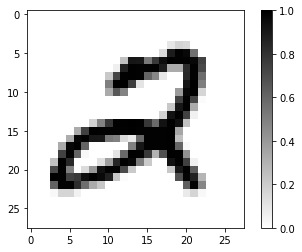

In [10]:
for image, label in test_dataset.take(2):
  break
image = image.numpy().reshape((28,28)) 

# Plot the image 
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

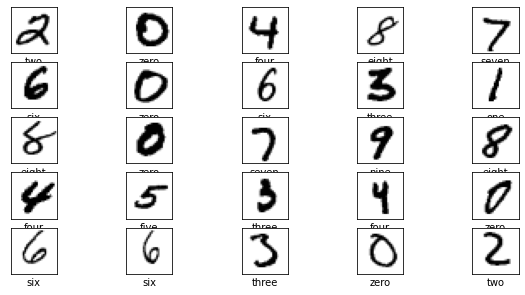

In [11]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adaGrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
BATCH_SIZE = 16
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.9709 - accuracy: 0.7696
Epoch 2/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5185 - accuracy: 0.8719
Epoch 3/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4359 - accuracy: 0.8874
Epoch 4/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3951 - accuracy: 0.8953
Epoch 5/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3727 - accuracy: 0.9006
Epoch 6/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3569 - accuracy: 0.9046
Epoch 7/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3386 - accuracy: 0.9077
Epoch 8/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3293 - accuracy: 0.9101
Epoch 9/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3258 - accuracy: 0.9103
Epoch 10/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.315

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3075 - accuracy: 0.9163
Accuracy on test dataset: 0.9163338541984558


In [17]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

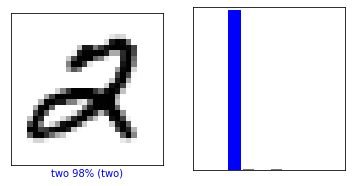

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

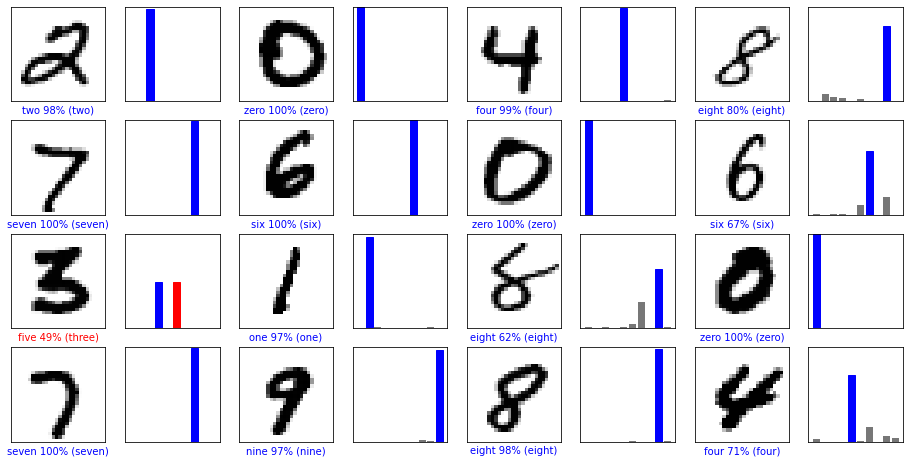

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows =4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
